# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as st
import random

df = pd.read_csv('EDA_human_temperature/data/human_body_temperature.csv')
sns.set()

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


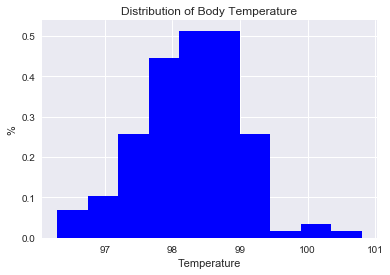

In [43]:
# Your work here.
_ = plt.hist(df.temperature, bins = 10, color='blue', normed=True )
plt.xlabel('Temperature')
plt.ylabel('%')
plt.title('Distribution of Body Temperature')
plt.show()


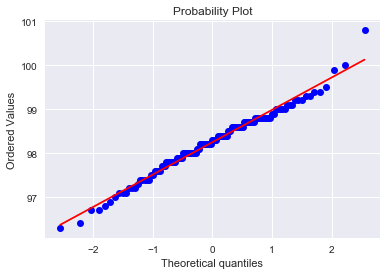

In [44]:
_=st.probplot(df.temperature,  plot=plt)
plt.show()

In [45]:
st.skewtest(df.temperature)

SkewtestResult(statistic=-0.021370491432770995, pvalue=0.9829501126135382)

1. Sample is normally distributed.
2. Sample is sufficiently large(n>30)
3. Each observation is independent.

In [46]:
n=len(df)
print ('n='+str(n))

n=130


In [47]:
sample_mean = np.mean(df.temperature)
print('Sample mean: '+str(sample_mean))

Sample mean: 98.2492307692


# Bootstrapping

In [48]:
bs_means = np.empty(10000)
for i in range(10000):
    bs_means[i] = np.mean(np.random.choice(df.temperature,len(df)))

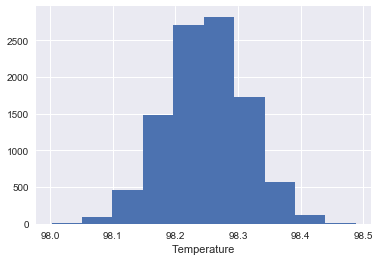

Bootstrap sample mean: 98.24892200000001


In [49]:
_ = plt.hist(bs_means)
plt.xlabel('Temperature')
plt.show()
print ('Bootstrap sample mean: '+str(np.mean(bs_means)))

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


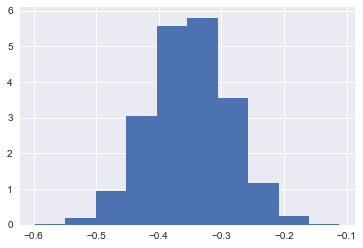

The difference from 98.6 degrees is between -0.5146153846153965 and -0.1853846153846063 with 99% confidence.
p-value: 0.0


In [80]:
diff_means = bs_means - 98.6
_=plt.hist(diff_means, normed=True)
plt.show()
ci = np.percentile(diff_means,[0.5,99.5])
print('The difference from 98.6 degrees is between ' +str(ci[0])+' and '+str(ci[1])+' with 99% confidence.')
p=(diff_means>0).mean()
print('p-value: '+str(p))

In [51]:
ci_means = np.percentile(bs_means,[0.5,99.5])
print(ci_means)

[98.08538462 98.41461538]


# Z-tests & T-tests

In [52]:
#H(0): sample_mean = 98.6 (population_mean)
#H(a): sample_mean != 98.6 (population_mean)
#99% confidence level (a=0.01)
def z_score(sample,pop_mean):
    #return (np.mean(sample)-pop_mean)/(np.std(sample)/np.sqrt(len(sample)))
    return (np.mean(sample)-pop_mean)/(np.std(sample)/np.sqrt(len(sample)))

In [53]:
z = z_score(df.temperature,98.6)
print(z)
print('p-value(z-test): '+str(st.norm.cdf(z)))
print('p-value(t-test): '+str(st.t.cdf(z,n-1)))

-5.475925202078116
p-value(z-test): 2.1761575829410943e-08
p-value(t-test): 1.0943732312047587e-07


This is a two-tailed significance test, as we want to determine whether the sample mean is different from a 'known' population mean, rather than specifically greater or less than that value. Because n>30, a z-test is more appropriate to use than a t-test.

<b>Conclusion:</b>

Using both our bootstrapping approach and frequentist approach, we reject the null hypothesis with a 99% confidence level. The true mean for average body temperature is likely not 98.6 degrees F.

In [54]:
#Random sample of 10 observations
s = random.sample(df.temperature.tolist(), 10)
z = z_score(s,98.6)
print(z)
print('p-value(z-test): '+str(st.norm.cdf(z)))
print('p-value(t-test): '+str(st.t.cdf(z,n-1)))

-1.0204311917855282
p-value(z-test): 0.15376200350823976
p-value(t-test): 0.1547169543097415


When n<30, as in this sample, it is more appropriate to use a t-test. The p-value for the t-test is higher than the p-value for z-test, due to the t-statistic distribution having fatter tails. This is the opposite of what's seen above, when n>30 and the p-value for the z-test is greater than the p-value for the t-test.

# Detecting abnormal temp. 

In [75]:
#Bootstrapping - cont. from above
bs_sample = np.empty(10000)
for i in range(10000):
    bs_sample[i] = np.mean(np.random.choice(df.temperature,len(df)))
    
ci_bs = np.percentile(bs_sample,[2.5,97.5])
print('Bootstrapping "normal" range: '+str(ci_bs)+' degrees F.')
print('Margin of error: '+str((ci_bs[1]-ci_bs[0])/2)+' degrees F.')





Bootstrapping "normal" range: [98.12       98.37463462] degrees F.
Margin of error: 0.12731730769230865 degrees F.


In [74]:
z=st.norm.ppf(.025)
m = np.mean(df.temperature)
s = np.std(df.temperature)/np.sqrt(len(df))

print('Abnormal is < '+str(round((m+z*s),2))+'degrees or > '+str(round((m-z*s),2))+' degrees.')

Abnormal is < 98.12degrees or > 98.37 degrees.


# Gender Difference in Avg. Temp.

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


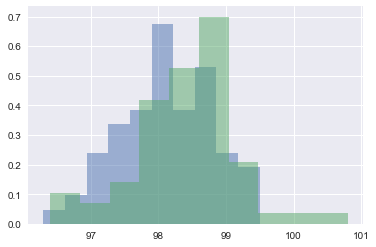

In [81]:
m=df[df['gender']=='M']['temperature']
f=df[df['gender']=='F']['temperature']
_=plt.hist(m, normed=True, alpha=0.5)
_=plt.hist(f, normed=True, alpha=0.5)
plt.show()

In [90]:
#H(0): There is no difference between genders with regard to average body temperature. (mean(M)==mean(F))
#H(a): There is a difference in body temperature between genders. (mean(M)!=mean(F))
#Testing statistic: mean

#Permuting:
n_m = len(m)
print('M: '+str(n_m)+', mean: '+str(np.mean(m)))
n_f = len(f)
print('F: '+str(n_m)+', mean: '+str(np.mean(f)))
b = np.concatenate((m,f))
print('mean_all: '+str(np.mean(b)))
diff_means = np.mean(m)-np.mean(f)

p_diffs = np.empty(10000)

for i in range(10000):
    scrambled = np.random.permutation(b)
    m_scrambled = scrambled[:65]
    f_scrambled = scrambled[65:]
    p_diffs[i] = abs(np.mean(m_scrambled)-np.mean(f_scrambled))


p = np.sum(p_diffs>=diff_means)/len(p_diffs)
print( 'p-value: '+str(p))

M: 65, mean: 98.1046153846
F: 65, mean: 98.3938461538
mean_all: 98.24923076923076
p-value: 1


In [91]:
np.sum(p_diffs>=diff_means)

10000

In [84]:
#z-test
z = diff_means/((np.sqrt(np.var(m)+np.var(f))/np.sqrt(65)))

print('p-value: '+str(st.norm.cdf(z)*2))

p-value: 0.02126645183012935


Based on permutations and z-testing, there was no significant difference between genders at 95% confidence level. 